# Analyzing Crime In Los Angeles

### Background
Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. This is the juncture where the project objective assumes significance.

### Objective
Support the Los Angeles Police Department (LAPD) by cleaning and analyzing the crime data to identify patterns in criminal behavior. The LAPD plans to use our insights to allocate resources effectively to tackle various crimes in different areas.

### TO DO
- Clean and prepare the dataset for analysis
- Perform exploratory data analysis
- Formulate and address questions related to crime trends, patterns, and factors influencing crime rates.

<hr>
<hr>

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

<hr>

### Data Collection & Inspection

In [2]:
print("Loading Dataset.....")

df = pd.read_csv("crimes.csv")
df.head()

Loading Dataset.....


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
print("Number of records (rows) in dataset : {}".format(df.shape[0]))
print("Number of attributes (columns) in dataset : {}".format(df.shape[1]))

Number of records (rows) in dataset : 820599
Number of attributes (columns) in dataset : 28


In [4]:
print("Information On Dataset")
df.info()

Information On Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           820599 non-null  int64  
 1   Date Rptd       820599 non-null  object 
 2   DATE OCC        820599 non-null  object 
 3   TIME OCC        820599 non-null  int64  
 4   AREA            820599 non-null  int64  
 5   AREA NAME       820599 non-null  object 
 6   Rpt Dist No     820599 non-null  int64  
 7   Part 1-2        820599 non-null  int64  
 8   Crm Cd          820599 non-null  int64  
 9   Crm Cd Desc     820599 non-null  object 
 10  Mocodes         707114 non-null  object 
 11  Vict Age        820599 non-null  int64  
 12  Vict Sex        712653 non-null  object 
 13  Vict Descent    712645 non-null  object 
 14  Premis Cd       820589 non-null  float64
 15  Premis Desc     820116 non-null  object 
 16  Weapon Used Cd  286078 non-null  

#### Discriptive Statistics Of Dataset

In [5]:
# Numerical Statistics
df.describe(include=[np.number]).round(3)

# similar to 
# df.describe().round(3)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.205990e+05,820599.000,820599.000,820599.000,820599.000,820599.000,820599.000,820589.000,286078.000,820589.000,60413.000,2025.000,60.000,820599.000,820599.000
mean,2.161299e+08,1335.627,10.712,1117.592,1.414,500.804,29.806,305.759,362.917,500.542,957.478,983.615,990.750,33.605,-116.726
std,1.083045e+07,654.021,6.094,609.361,0.493,207.808,21.777,216.670,123.754,207.596,111.524,52.845,27.908,3.970,13.786
min,8.170000e+02,1.000,1.000,101.000,1.000,110.000,-3.000,101.000,101.000,110.000,210.000,310.000,821.000,0.000,-118.668
25%,2.102046e+08,900.000,6.000,621.000,1.000,331.000,7.000,101.000,310.000,331.000,998.000,998.000,998.000,34.010,-118.429
50%,2.201176e+08,1415.000,11.000,1142.000,1.000,442.000,31.000,203.000,400.000,442.000,998.000,998.000,998.000,34.058,-118.319
75%,2.220056e+08,1900.000,16.000,1617.000,2.000,626.000,45.000,501.000,400.000,626.000,998.000,998.000,998.000,34.162,-118.273
max,2.399165e+08,2359.000,21.000,2199.000,2.000,956.000,120.000,976.000,516.000,956.000,999.000,999.000,999.000,34.334,0.000


In [6]:
# Categorical Statistics
df.describe(include=[object])

# here, similar to
# df.describe(include=['O'])

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,820599,820599,820599,820599,707114,712653,712645,820116,286078,820599,820599,820599,131214
unique,1385,1385,21,138,273856,5,20,306,79,6,6,63719,9688
top,02/03/2023 12:00:00 AM,12/02/2022 12:00:00 AM,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,924,1130,55209,87888,33541,338824,251794,207601,153313,656897,656897,1486,2184


In [7]:
print("Column Names")
df.columns

Column Names


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

<hr>
<hr>

### Data Cleaning

#### Formating Date & Time

In [8]:
# Convert data types if needed (e.g., dates to date format, numerical values to appropriate numeric types).
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %H:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %H:%M:%S %p')
df.iloc[:, [1,2]].head()

,Date Rptd,DATE OCC
0,2020-01-08 12:00:00,2020-01-08 12:00:00
1,2020-01-02 12:00:00,2020-01-01 12:00:00
2,2020-04-14 12:00:00,2020-02-13 12:00:00
3,2020-01-01 12:00:00,2020-01-01 12:00:00
4,2020-01-01 12:00:00,2020-01-01 12:00:00


In [9]:
df['TIME OCC'] = df['TIME OCC'].apply(lambda x : str(x).zfill(4))
df['TIME OCC'] = df['TIME OCC'].apply(lambda x : x[:2] + ':' + x[2:])
df['TIME OCC'].head()

0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
Name: TIME OCC, dtype: object

In [10]:
# Viewing Dataframe after Data Type change
display(df.iloc[:, [1,2,3]].info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date Rptd  820599 non-null  datetime64[ns]
 1   DATE OCC   820599 non-null  datetime64[ns]
 2   TIME OCC   820599 non-null  object        
dtypes: datetime64[ns](2), object(1)
memory usage: 18.8+ MB


None

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08 12:00:00,2020-01-08 12:00:00,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02 12:00:00,2020-01-01 12:00:00,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14 12:00:00,2020-02-13 12:00:00,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01 12:00:00,2020-01-01 12:00:00,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01 12:00:00,2020-01-01 12:00:00,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


#### Missing Values

In [11]:
# Identifying Missing Data

df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           113485
Vict Age               0
Vict Sex          107946
Vict Descent      107954
Premis Cd             10
Premis Desc          483
Weapon Used Cd    534521
Weapon Desc       534521
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          760186
Crm Cd 3          818574
Crm Cd 4          820539
LOCATION               0
Cross Street      689385
LAT                    0
LON                    0
dtype: int64

<Axes: >

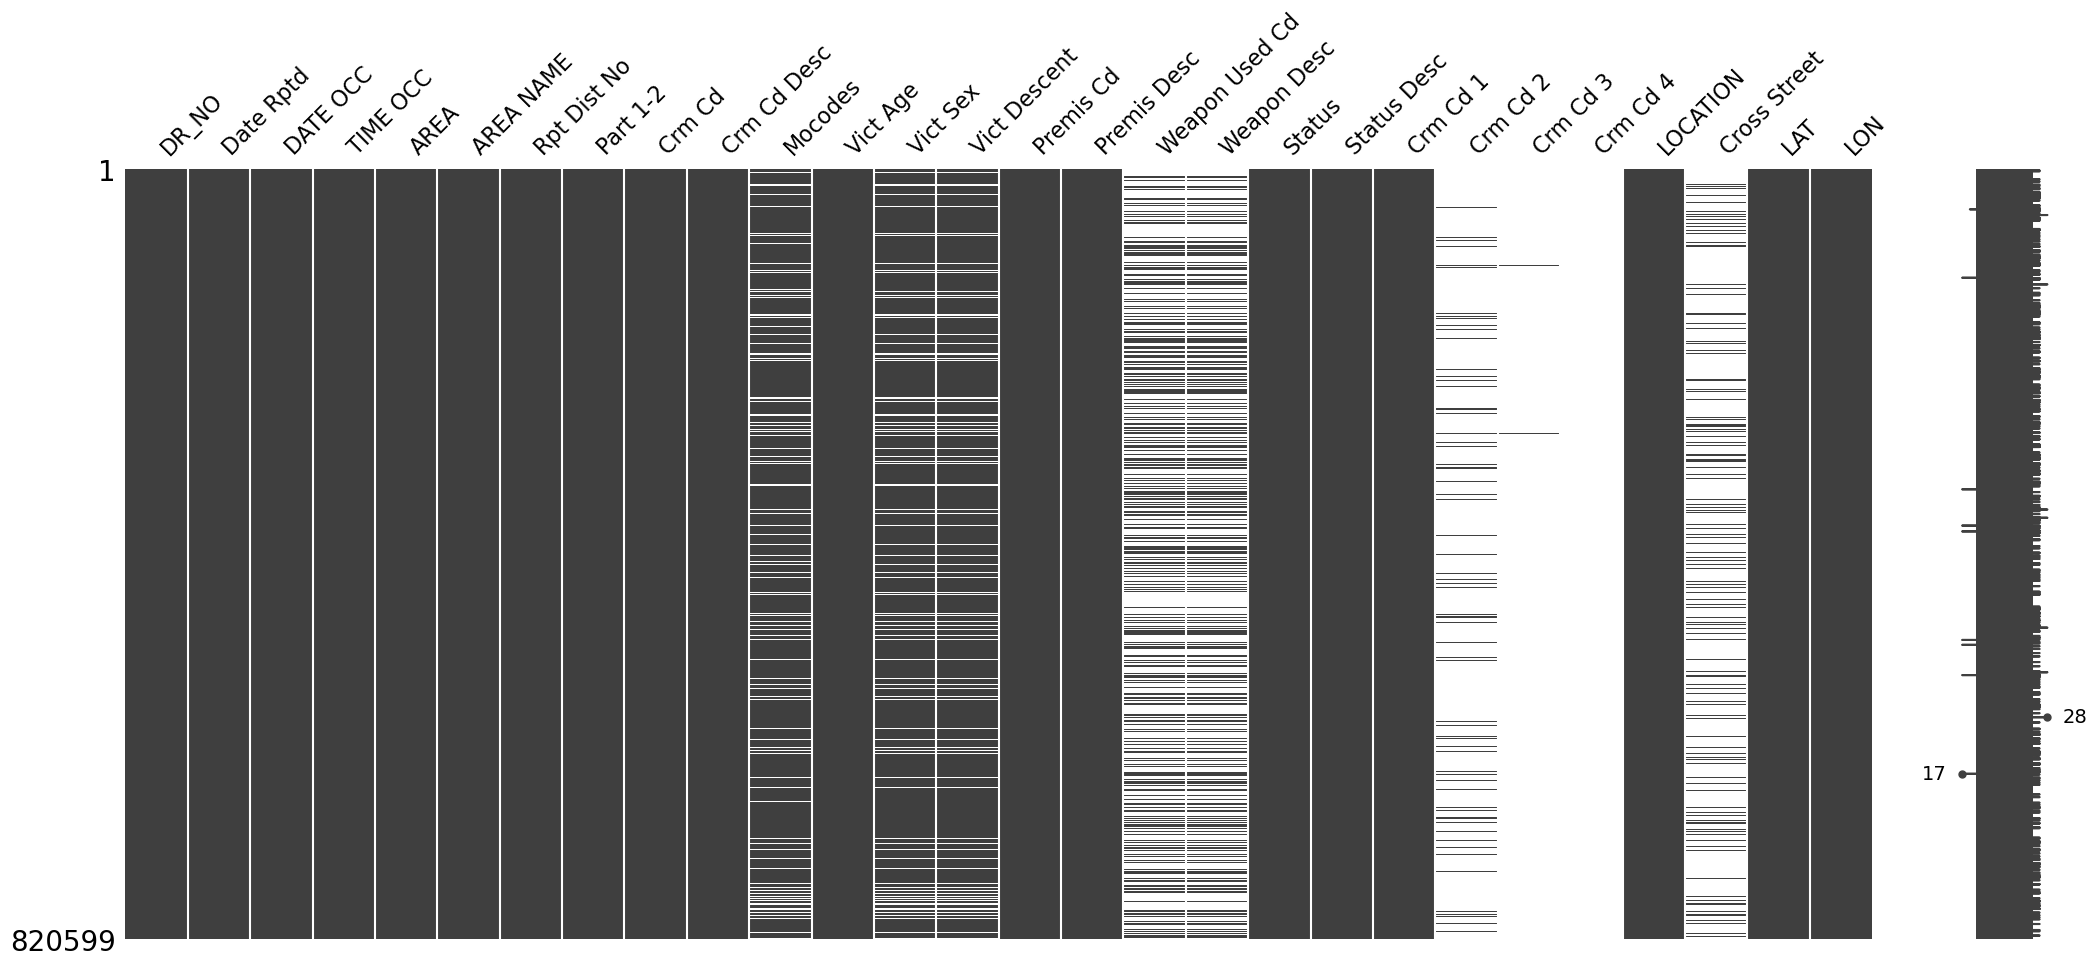

In [12]:
# Visualizing Missing Data Distribution
msno.matrix(df)

<Axes: >

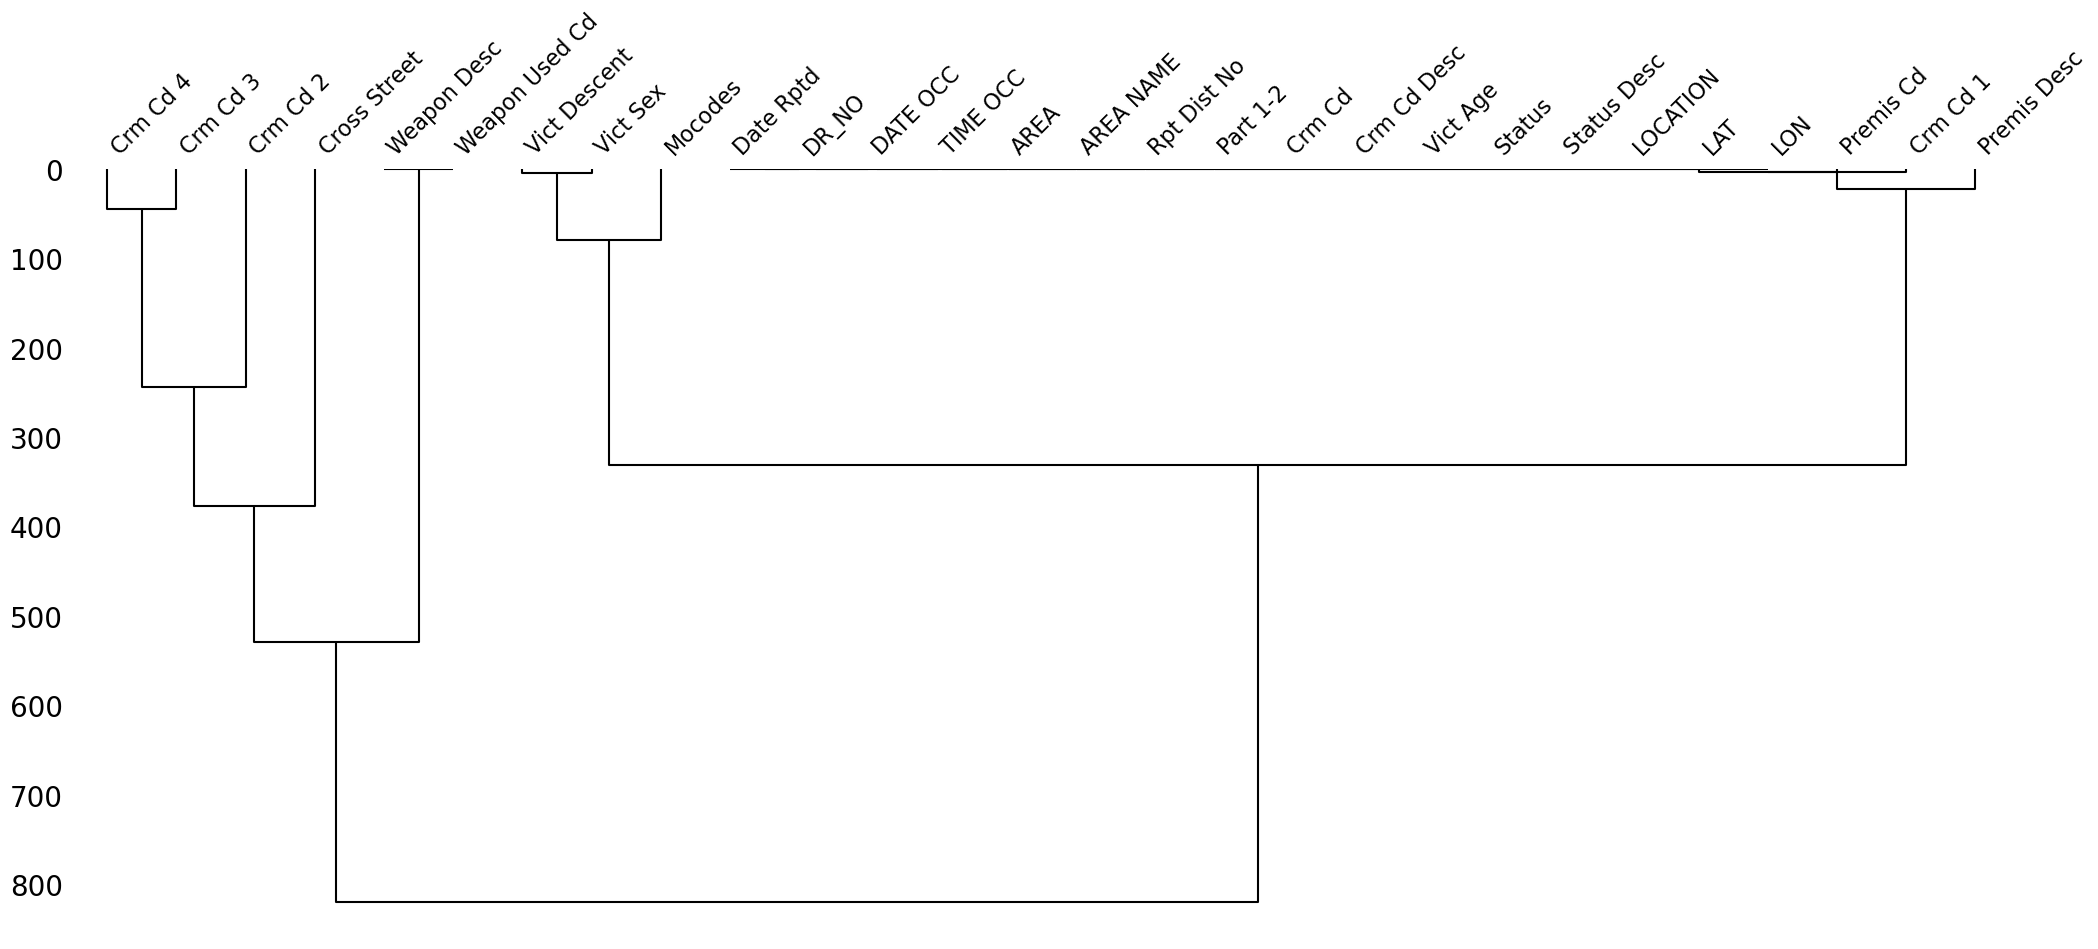

In [13]:
msno.dendrogram(df)

After visualizing the matrix graph and the dendrogram, we observe some sort of relationship between the missing values of the columns:
- Weapon Desc and Weapon Used Cd
- Vict Descent and Vict Sex

#### Duplicate Records

In [14]:
print("Number of duplicate rows : ", df.duplicated().sum())

Number of duplicate rows :  0


In [15]:
print("Number of duplicate values in DR_NO field : ", df['DR_NO'].duplicated().sum())

Number of duplicate values in DR_NO field :  0


- In df.duplicated().sum(), we calculated the number of duplicate records. No duplicate rows were found.
- In df['DR_NO].duplicated().sum(), we calculate the number of duplicate values in the "DR_NO" field, since it appears to be the primary key. No duplicate rows were found.

Thus we can safely assume that there are no duplicate records.